In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
import sys
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

In [2]:
### import polyscope as ps
#This is a quick script to open the RAW OBJ files from the size-stream scanner

infile="/Users/ahmedbaruwa/Downloads/OneDrive_2_8-11-2022/1_M_00001_08112022_Relaxed August 11 2022 02_45rawdata.obj"

#Read in vertices with x y z r g b values
data=[ l.strip('\nv').split() for l in open(infile).readlines() if l.startswith('v')]

pc=np.zeros((len(data),3))
color=np.zeros((len(data),3))

for i,d in enumerate(data):
    x,y,z,r,g,b=[float(n) for n in d]
    pc[i]=(x,y,z)
    color[i]=(r,g,b)
               
#ps.init()
#_p=ps.register_point_cloud('pc',pc)
#_p.add_color_quantity('c',color)
#ps.show()

#Plot in poly scope


#Same thing for open3D with a color Filter
opc=o3d.geometry.PointCloud()
opc.points=o3d.utility.Vector3dVector(pc)
opc.colors=o3d.utility.Vector3dVector(color)
#opc=opc.voxel_down_sample(5)

cvals=np.asarray(opc.colors)

#cv=[1,0,0]

#Filter on Green pixels
cv=[0,1,0]
cos_dist=1-(np.sum(cvals*cv,axis=1))/(np.linalg.norm(cvals,axis=1)*np.linalg.norm(cv)+sys.float_info.epsilon)
select=cos_dist < .2

sel=o3d.geometry.PointCloud()
sel.points=o3d.utility.Vector3dVector(np.asarray(opc.points)[select])
sel.colors=o3d.utility.Vector3dVector(np.asarray(opc.colors)[select])
#o3d.visualization.draw_geometries([opc])

#o3d.visualization.draw_geometries([sel])



In [3]:
pc[select].shape


(1451, 3)

In [19]:
selected_points = np.concatenate([pc[select], color[select]], axis=1)

#acluster=DBSCAN(eps=0.5,min_samples=15).fit(selected_points)
acluster = AgglomerativeClustering(n_clusters=10).fit(selected_points)
#acluster = KMeans(n_clusters=20).fit(selected_points)

In [5]:
cluster_sizes = [(idx,len(np.argwhere(acluster.labels_==idx))) for idx in range(acluster.n_clusters)]

In [6]:
cluster_density = sorted(cluster_sizes, key=lambda x: x[1], reverse=True)
cluster_density


[(2, 501),
 (5, 355),
 (1, 281),
 (3, 275),
 (4, 17),
 (6, 11),
 (0, 6),
 (7, 2),
 (8, 2),
 (9, 1)]

In [7]:
### There are five markers on the subject's body. 
top5 = cluster_density[:5]
points = []; clrs = []
for idx, _ in top5:
    sel=np.argwhere(acluster.labels_==idx).flatten()
    points.extend(selected_points[sel])
    clrs.extend(selected_points[sel])

In [8]:
len(points)

1429

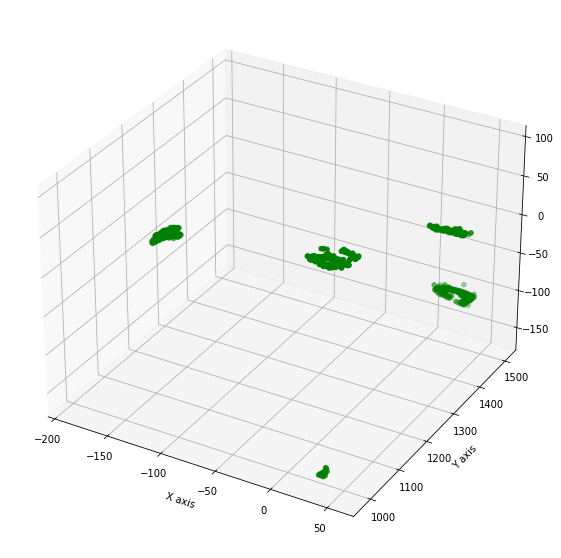

In [9]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection='3d')
points = np.array(points)
x=points[:,0]
y=points[:,1]
z=points[:,2]

ax.scatter(x,y,z,c='g', marker='o')
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_label('Z Label')
plt.show()

In [10]:
sel=o3d.geometry.PointCloud()
sel.points=o3d.utility.Vector3dVector(points[:,:3])
sel.colors=o3d.utility.Vector3dVector(points[:,3:])
#o3d.visualization.draw_geometries([opc])


print('Filter points only')
o3d.visualization.draw_geometries([sel])

Filter points only
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


### Landmark coordinates

In [18]:
landmark_locations = []
for idx, _ in top5:
    sel=np.argwhere(acluster.labels_==idx).flatten()
    centroid = np.mean(selected_points[sel][:,:3], axis=0)
    print(centroid)
    landmark_locations.append(centroid)

[-176.14211577 1229.84630739  -25.15369261]
[  26.13267606 1040.30394366   84.22028169]
[  37.6911032  1421.39644128    3.4658363 ]
[  26.75163636 1491.68436364 -105.82763636]
[  35.30588235  984.11764706 -158.97058824]
